In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("FeedbackFile_2024-09-14_to_2024-09-20_9.csv")
df.shape

C:\Users\hp\AppData\Local\Temp\ipykernel_22212\2927455588.py:1: DtypeWarning: Columns (31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("FeedbackFile_2024-09-14_to_2024-09-20_9.csv")


(20409, 50)

In [3]:
df = df[df['name']=="Sink Plumbing"]
df.shape

(6734, 50)

In [4]:
chrp_co = df["chrp_co_ordinates"]
chrp_co.shape

(6734,)

In [10]:
# Converting the chrp_co_ordinates into the list

import ast

def safe_literal_eval(x):
    try:
        return ast.literal_eval(x)
    except (SyntaxError, ValueError):
        return None

# Apply the safe_literal_eval function to the entire column
chrp_co = chrp_co.astype(str).apply(safe_literal_eval)

# Get the list of lists
coordinates_list = chrp_co.tolist()

# Process the coordinates_list to ensure square brackets
for i, item in enumerate(coordinates_list):
    if isinstance(item, tuple):
        coordinates_list[i] = list(item)  # Convert tuples to lists
    elif isinstance(item, str) and ',' in item:  # Handle string representations
        try:
            coordinates_list[i] = [float(val) for val in item.split(',')]
        except ValueError:
            pass
            
coordinates_list

[[0, 0.6052, 0.3899, 0.7728],
 [0.3856, 0.6171, 0.4636, 0.6567],
 [0, 0.4695, 0.042, 0.5687],
 [0.6966666666666665,
  0.47333333333333333,
  0.7966666666666666,
  0.5083333333333333],
 [0.0992, 0.172, 0.4625, 0.4633],
 [0.216, 0.6845, 0.4816, 0.8856],
 [0.4623, 0.419, 0.5459, 0.4881],
 [0.4812, 0.6601, 0.5372, 0.7252],
 [0.0216, 0, 0.4053, 0.3251],
 [0.406, 0.2212, 0.4722, 0.3396],
 [0.1337, 0.623, 0.1875, 0.7563],
 [0.4162, 0.6108, 0.4782, 0.6438],
 [0.5466, 0.7897, 0.6297, 0.9239],
 [0.5136, 0.4547, 0.5789, 0.5605],
 [0.4298, 0.4226, 0.5164, 0.5268],
 [0.3155, 0.2999, 0.4308, 0.3436],
 [0.1143, 0.7536, 0.5491, 1],
 [0.3943, 0.251, 0.4504, 0.3016],
 [0.3991, 0.6845, 0.4549, 0.7338],
 [0.0992, 0.4144, 0.2185, 0.6538],
 [0.1002, 0.2626, 0.3951, 0.2933],
 [0.0965, 0.5549, 0.4005, 0.7229],
 [0.5734, 0.6759, 0.6421, 0.7321],
 [0.1287, 0.6174, 0.5523, 0.6944],
 [0.4249, 0.1528, 0.6002, 0.3965],
 [0.4325, 0.3558, 0.7076, 0.7282],
 [0.0833, 0.1488, 0.6034, 0.5513],
 [0.0843, 0.4491, 0.468, 0.

In [6]:
import os

def extract_image_name(url):
    base_name = os.path.basename(url)
    name, ext = os.path.splitext(base_name)
    return name + '.jpg'

df['image_name'] = df['image_url'].apply(extract_image_name)
chrp_co_ordinates = df["chrp_co_ordinates"]
img_name = df['image_name']
img_name

14       390f095b-ed40-4831-8a22-651b6e9acb8f.jpg
15       390f095b-ed40-4831-8a22-651b6e9acb8f.jpg
16       390f095b-ed40-4831-8a22-651b6e9acb8f.jpg
17       390f095b-ed40-4831-8a22-651b6e9acb8f.jpg
19       ceda5ac3-9414-4145-a746-00c6a57c2d8e.jpg
                           ...                   
20379    24b1d78c-fa6a-4e1d-a9af-b5add13a1430.jpg
20385    148941b9-4516-4ed6-a603-ea549f8f7307.jpg
20386    148941b9-4516-4ed6-a603-ea549f8f7307.jpg
20387    148941b9-4516-4ed6-a603-ea549f8f7307.jpg
20388    148941b9-4516-4ed6-a603-ea549f8f7307.jpg
Name: image_name, Length: 6734, dtype: object

In [7]:
type(coordinates_list)

list

Image loaded successfully. Dimensions: (4032, 3024, 3) (HWC)


C:\Users\hp\anaconda3\Lib\site-packages\segment_anything\build_sam.py:105: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load(f)


SAM model initialized successfully
Image set in SAM predictor successfully

Processing box 1: [801, 1936, 1006, 2190]
Box dimensions: 205px wide, 254px tall
Mask generated successfully (score: 0.92)

Processing box 2: [2411, 1909, 2619, 2180]
Box dimensions: 208px wide, 271px tall
Mask generated successfully (score: 0.93)

Processing box 3: [1691, 66, 2554, 1913]
Box dimensions: 863px wide, 1847px tall
Mask generated successfully (score: 0.96)

Processing box 4: [882, 135, 1029, 1941]
Box dimensions: 147px wide, 1806px tall
Mask generated successfully (score: 0.95)

Processing box 5: [1424, 68, 2271, 1080]
Box dimensions: 847px wide, 1012px tall
Mask generated successfully (score: 0.93)


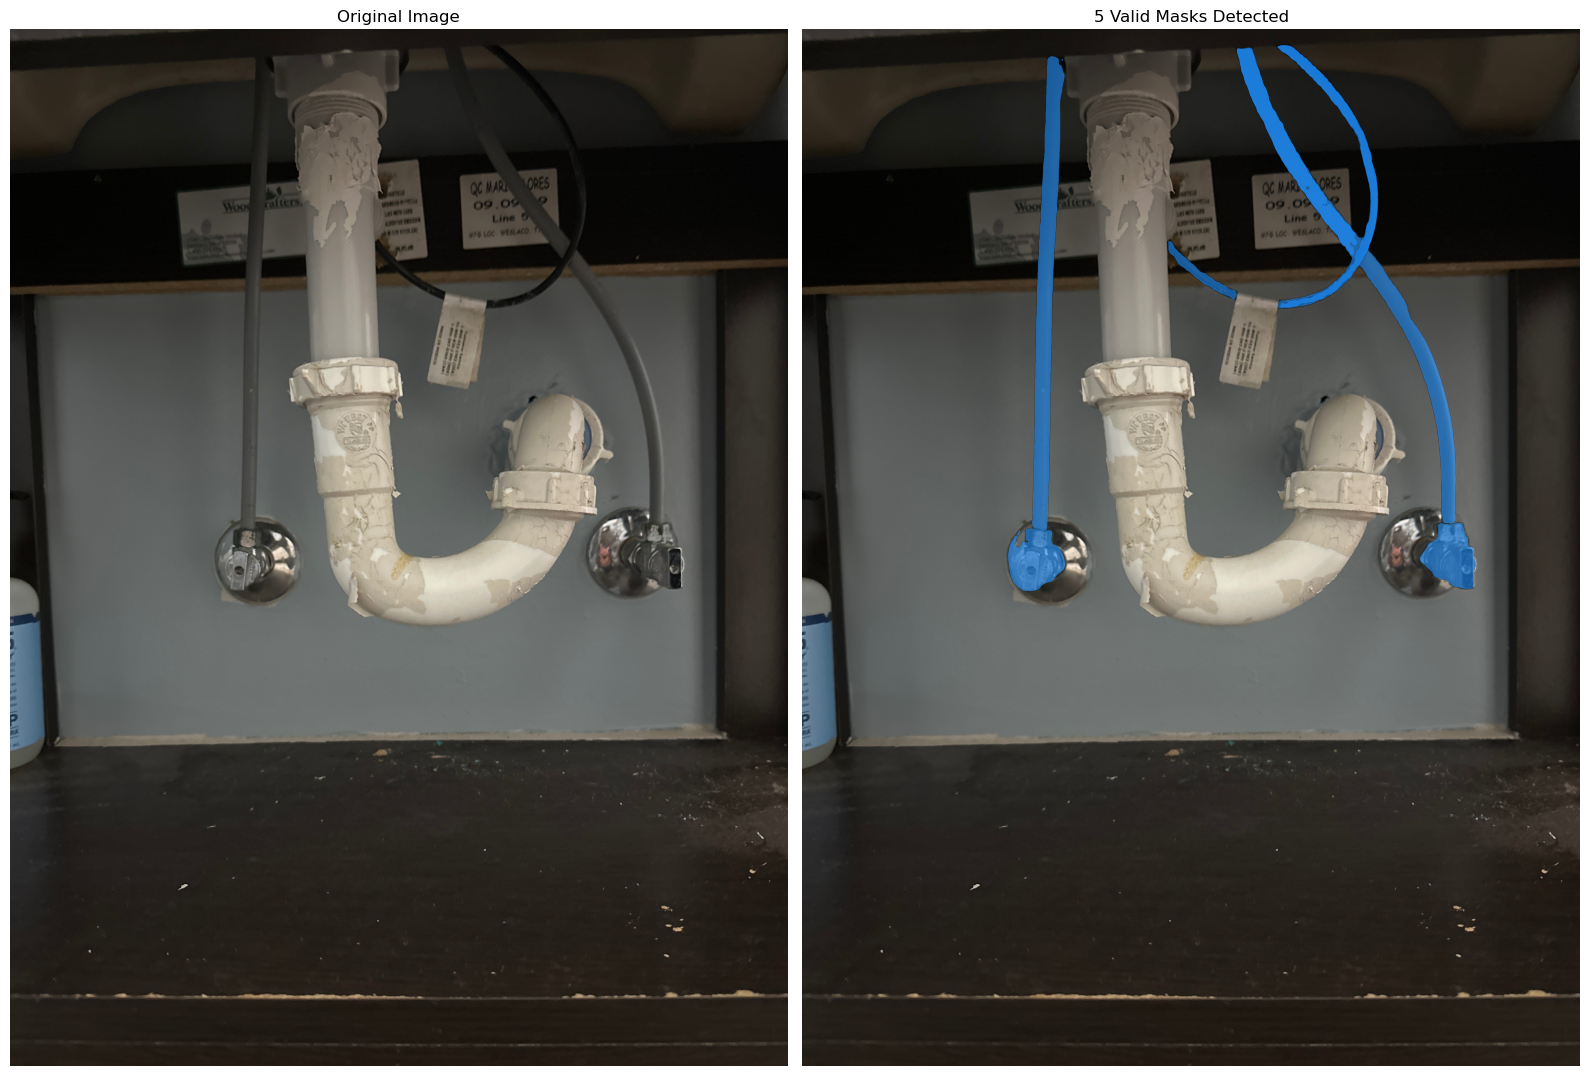


Mask 1 (Box: [801, 1936, 1006, 2190]):
Top-left: (800, 1940)
Bottom-right: (1022, 2185)
Total pixels: 39597

Mask 2 (Box: [2411, 1909, 2619, 2180]):
Top-left: (2400, 1919)
Bottom-right: (2618, 2177)
Total pixels: 37755

Mask 3 (Box: [1691, 66, 2554, 1913]):
Top-left: (1690, 63)
Bottom-right: (2541, 1923)
Total pixels: 164759

Mask 4 (Box: [882, 135, 1029, 1941]):
Top-left: (893, 105)
Bottom-right: (1021, 1953)
Total pixels: 113276

Mask 5 (Box: [1424, 68, 2271, 1080]):
Top-left: (1423, 62)
Bottom-right: (2239, 1086)
Total pixels: 118944


In [8]:
import torch
import numpy as np
import cv2
from segment_anything import SamPredictor, sam_model_registry
import matplotlib.pyplot as plt

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

def main():
    # Configuration
    image_path = r"4d216062-4048-4563-a2c3-0c88bf1f2187.jpg"
    checkpoint_path = r"vit_b.pth"
    model_type = "vit_b"
    bboxes = [
        [801, 1936, 1006, 2190],
        [2411, 1909, 2619, 2180],
        [1691, 66, 2554, 1913],
        [882, 135, 1029, 1941],
        [1424, 68, 2271, 1080]
    ]

    try:
        # 1. Load and validate image
        image = cv2.imread(image_path)
        if image is None:
            raise FileNotFoundError(f"Image not found at {image_path}")
            
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        print(f"Image loaded successfully. Dimensions: {image.shape} (HWC)")

        # 2. Initialize SAM model with error handling
        try:
            sam = sam_model_registry[model_type](checkpoint=checkpoint_path)
            sam.to(device='cpu')
            predictor = SamPredictor(sam)
            print("SAM model initialized successfully")
        except Exception as e:
            raise RuntimeError(f"Model initialization failed: {str(e)}")

        # 3. Set image in predictor
        try:
            predictor.set_image(image_rgb)
            print("Image set in SAM predictor successfully")
        except Exception as e:
            raise RuntimeError(f"Failed to set image: {str(e)}")

        # 4. Process bounding boxes
        all_masks = []
        valid_boxes = []
        
        for i, box in enumerate(bboxes):
            try:
                # Validate box coordinates
                x1, y1, x2, y2 = box
                height, width = image.shape[:2]
                
                if not (0 <= x1 < x2 <= width):
                    raise ValueError(f"Invalid X coordinates: {x1}-{x2} (image width: {width})")
                if not (0 <= y1 < y2 <= height):
                    raise ValueError(f"Invalid Y coordinates: {y1}-{y2} (image height: {height})")

                print(f"\nProcessing box {i+1}: {box}")
                print(f"Box dimensions: {x2-x1}px wide, {y2-y1}px tall")

                # Predict mask
                masks, scores, _ = predictor.predict(
                    box=np.array([box]),
                    multimask_output=False
                )
                
                all_masks.append(masks[0])
                valid_boxes.append(box)
                print(f"Mask generated successfully (score: {scores[0]:.2f})")

            except Exception as e:
                print(f"Error processing box {i+1}: {str(e)}")
                continue

        # 5. Visualization
        if len(all_masks) > 0:
            plt.figure(figsize=(16, 12))
            
            # Show original image
            plt.subplot(1, 2, 1)
            plt.imshow(image_rgb)
            plt.title("Original Image")
            plt.axis('off')

            # Show masks
            plt.subplot(1, 2, 2)
            plt.imshow(image_rgb)
            for mask in all_masks:
                show_mask(mask, plt.gca())
            plt.title(f"{len(all_masks)} Valid Masks Detected")
            plt.axis('off')

            plt.tight_layout()
            plt.show()

            # Print segmentation coordinates
            for i, (mask, box) in enumerate(zip(all_masks, valid_boxes)):
                y_indices, x_indices = np.where(mask)
                print(f"\nMask {i+1} (Box: {box}):")
                print(f"Top-left: ({x_indices.min()}, {y_indices.min()})")
                print(f"Bottom-right: ({x_indices.max()}, {y_indices.max()})")
                print(f"Total pixels: {len(x_indices)}")
        else:
            print("No valid masks generated")

    except Exception as e:
        print(f"\nCritical error: {str(e)}")

if __name__ == "__main__":
    main()

In [9]:
import torch
import os
import ast
import cv2
import pandas as pd
import numpy as np
from segment_anything import SamPredictor, sam_model_registry
from tqdm import tqdm

def fix_coordinate_order(coords):
    """Fix coordinate order from [y1, x1, y2, x2] to [x1, y1, x2, y2]"""
    if len(coords) != 4:
        return None
    return [coords[1], coords[0], coords[3], coords[2]]

def process_coordinates(coord_str):
    """Parse and validate coordinate string with error handling"""
    try:
        coords = ast.literal_eval(str(coord_str))
        if len(coords) == 4 and all(0 <= c <= 1 for c in coords):
            return fix_coordinate_order(coords)
    except (ValueError, SyntaxError, TypeError):
        return None
    return None

def find_image(image_dir, target_name):
    """Find image file with case-insensitive search and multiple extensions"""
    target_base = os.path.splitext(target_name)[0].lower()
    for ext in ['.jpg', '.jpeg', '.png', '.webp']:
        for f in os.listdir(image_dir):
            if f.lower().endswith(ext) and os.path.splitext(f)[0].lower() == target_base:
                return os.path.join(image_dir, f)
    return None

def normalized_to_pixels(coords, img_width, img_height):
    """Convert normalized coordinates to pixel values with validation"""
    try:
        x1 = int(coords[0] * img_width)
        y1 = int(coords[1] * img_height)
        x2 = int(coords[2] * img_width)
        y2 = int(coords[3] * img_height)
        return (x1, y1, x2, y2)
    except (TypeError, ValueError):
        return None

def process_images(csv_path, image_dir, output_dir, sam_checkpoint):
    # Create output directory
    os.makedirs(output_dir, exist_ok=True)
    
    # Load and prepare SAM model
    sam = sam_model_registry["vit_b"](checkpoint=sam_checkpoint)
    sam.to(device='cuda' if torch.cuda.is_available() else 'cpu')
    predictor = SamPredictor(sam)
    
    # Process CSV data with low_memory=False
    df = pd.read_csv(csv_path, low_memory=False)
    df['coords'] = df['chrp_co_ordinates'].apply(process_coordinates)
    df = df.dropna(subset=['coords'])
    
    # Improved filename parsing
    def parse_image_name(url):
        filename = os.path.basename(url).split('?')[0]
        name, ext = os.path.splitext(filename)
        return f"{name}{ext if ext else '.jpg'}"  # Ensure extension exists
    
    # Group coordinates by image
    df['image_name'] = df['image_url'].apply(parse_image_name)
    grouped = df.groupby('image_name')['coords'].agg(list)
    
    # Process images with progress bar
    for image_name, coord_list in tqdm(grouped.items(), desc="Processing Images"):
        # Find image file
        img_path = find_image(image_dir, image_name)
        if not img_path or not os.path.exists(img_path):
            continue
            
        # Load image
        image = cv2.imread(img_path)
        if image is None:
            continue
            
        # Get image dimensions
        img_h, img_w = image.shape[:2]
        
        # Convert coordinates to pixel values
        boxes = []
        for coords in coord_list:
            box = normalized_to_pixels(coords, img_w, img_h)
            if box and (0 <= box[0] < box[2] <= img_w) and (0 <= box[1] < box[3] <= img_h):
                boxes.append(np.array(box))
        
        # Skip if no valid boxes
        if not boxes:
            continue
            
        # Generate masks
        try:
            predictor.set_image(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            masks = []
            for box in boxes:
                mask, _, _ = predictor.predict(box=box[np.newaxis, :], multimask_output=False)
                masks.append(mask[0])
        except Exception as e:
            continue
            
        # Save results with proper extension handling
        base_name = os.path.splitext(image_name)[0]
        output_path = os.path.join(output_dir, f"processed_{base_name}.jpg")
        save_visualization(image, masks, boxes, output_path)

def save_visualization(image, masks, boxes, output_path):
    """Save visualization with original image, boxes, and masks"""
    # Create overlay
    overlay = image.copy()
    for mask, box in zip(masks, boxes):
        # Apply green mask overlay
        overlay[mask] = (0, 255, 0)
        # Draw bounding box
        cv2.rectangle(overlay, (box[0], box[1]), (box[2], box[3]), (255, 0, 0), 2)
    
    # Combine with original image
    combined = np.hstack([image, overlay])
    # Force JPEG format with quality parameter
    cv2.imwrite(output_path, combined, [int(cv2.IMWRITE_JPEG_QUALITY), 95])

if __name__ == "__main__":
    # Configuration
    CSV_PATH = "FeedbackFile_2024-09-14_to_2024-09-20_9.csv"
    IMAGE_DIR = r"C:\Users\hp\OneDrive\Desktop\CHRP TECH\chrp\images\images"
    OUTPUT_DIR = r"C:\Users\hp\OneDrive\Desktop\CHRP TECH\chrp\processed_results"
    SAM_CHECKPOINT = r"C:\Users\hp\OneDrive\Desktop\CHRP TECH\chrp\vit_b.pth"
    
    process_images(
        csv_path=CSV_PATH,
        image_dir=IMAGE_DIR,
        output_dir=OUTPUT_DIR,
        sam_checkpoint=SAM_CHECKPOINT
    )

Processing Images: 3it [00:08,  2.80s/it]


KeyboardInterrupt: 